# **Simple Sentiment Analysis on IMDB Reviews**

## **Import Library**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow version: ', tf.__version__)
print('TensorFlow Datasets version: ', tfds.__version__)
print('NumPy version: ', np.__version__)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

TensorFlow version:  2.5.0
TensorFlow Datasets version:  4.0.1
NumPy version:  1.19.5


## **General Function**

### **Model Compiling and Fitting**

In [2]:
def model_compile_and_fit(model, training_data, training_labels, testing_data, testing_labels, number_of_epochs=50, ):
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  model_history = model.fit(training_data, 
                  training_labels, 
                  epochs=number_of_epochs,
                  validation_data=(testing_data, testing_labels),
                  verbose=2)
  return model_history

### **Model History Plotting**

In [3]:
def plot_model_graph(history_model, list_data, list_labels, title):
  plt.figure(figsize=(8,4))
  
  for x in range(len(list_data)):
    plt.plot(history_model.history[list_data[x]], label=list_labels[x])
    
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(list_labels, loc='upper left')
  plt.title(title)
  plt.show()

## **Import Dataset**

In [4]:
imdb_data, imdb_info = tfds.load('imdb_reviews', as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0VQBI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0VQBI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0VQBI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## **A Glimpse of the Dataset**

In [5]:
imdb_data

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [6]:
imdb_info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

## **Preparing Training and Testing Data**

In [7]:
training_data, testing_data = imdb_data['train'], imdb_data['test']

In [8]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for sentence, label in training_data:
  training_sentences.append(str(sentence.numpy()))
  training_labels.append(label.numpy())

for sentence, label in testing_data:
  testing_sentences.append(str(sentence.numpy()))
  testing_labels.append(label.numpy())

In [9]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## **Tokenization**

In [10]:
'''
Tokenizer specification
'''

vocabulary_size = 10000
oov_string = '<OOV>'
embedding_dimension = 16
max_length = 140
trunc_type = 'post'

In [11]:
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token=oov_string)
tokenizer.fit_on_texts(training_sentences)

In [12]:
word_index = tokenizer.word_index

In [13]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)

In [14]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)

In [15]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [16]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

## **Building & Training Model**

### **Using Only Embedding**

In [17]:
model_embedding_only = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocabulary_size, embedding_dimension, input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_embedding_only.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 2240)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                71712     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 231,745
Trainable params: 231,745
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_embedding_only_history = model_compile_and_fit(model_embedding_only, training_padded, 
                                                     training_labels_final, testing_padded, testing_labels_final)

Epoch 1/50
782/782 - 6s - loss: 0.4514 - accuracy: 0.7738 - val_loss: 0.3360 - val_accuracy: 0.8524
Epoch 2/50
782/782 - 4s - loss: 0.1944 - accuracy: 0.9275 - val_loss: 0.4129 - val_accuracy: 0.8290
Epoch 3/50
782/782 - 4s - loss: 0.0487 - accuracy: 0.9878 - val_loss: 0.5295 - val_accuracy: 0.8240
Epoch 4/50
782/782 - 4s - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.6298 - val_accuracy: 0.8284
Epoch 5/50
782/782 - 4s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6774 - val_accuracy: 0.8320
Epoch 6/50
782/782 - 4s - loss: 5.0269e-04 - accuracy: 1.0000 - val_loss: 0.7214 - val_accuracy: 0.8327
Epoch 7/50
782/782 - 4s - loss: 2.6873e-04 - accuracy: 1.0000 - val_loss: 0.7590 - val_accuracy: 0.8337
Epoch 8/50
782/782 - 4s - loss: 1.5652e-04 - accuracy: 1.0000 - val_loss: 0.7940 - val_accuracy: 0.8348
Epoch 9/50
782/782 - 4s - loss: 9.3049e-05 - accuracy: 1.0000 - val_loss: 0.8293 - val_accuracy: 0.8345
Epoch 10/50
782/782 - 4s - loss: 5.8744e-05 - accuracy: 1.0000 - val_loss: 0.8632 - 

### **Using LSTM**

In [19]:
model_lstm = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocabulary_size, embedding_dimension, input_length=max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 140, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 140, 128)          41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 244,801
Trainable params: 244,801
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_lstm_history = model_compile_and_fit(model_lstm, training_padded, 
                                           training_labels_final, testing_padded, testing_labels_final)

Epoch 1/50
782/782 - 197s - loss: 0.4668 - accuracy: 0.7684 - val_loss: 0.3427 - val_accuracy: 0.8534
Epoch 2/50
782/782 - 191s - loss: 0.2854 - accuracy: 0.8864 - val_loss: 0.3425 - val_accuracy: 0.8506
Epoch 3/50
782/782 - 191s - loss: 0.2299 - accuracy: 0.9123 - val_loss: 0.3601 - val_accuracy: 0.8449
Epoch 4/50
782/782 - 191s - loss: 0.1708 - accuracy: 0.9392 - val_loss: 0.4136 - val_accuracy: 0.8368
Epoch 5/50
782/782 - 191s - loss: 0.1327 - accuracy: 0.9542 - val_loss: 0.5263 - val_accuracy: 0.8296
Epoch 6/50
782/782 - 191s - loss: 0.0969 - accuracy: 0.9682 - val_loss: 0.5269 - val_accuracy: 0.8306
Epoch 7/50
782/782 - 190s - loss: 0.0667 - accuracy: 0.9778 - val_loss: 0.5729 - val_accuracy: 0.8195
Epoch 8/50
782/782 - 191s - loss: 0.0557 - accuracy: 0.9811 - val_loss: 0.7144 - val_accuracy: 0.8277
Epoch 9/50
782/782 - 190s - loss: 0.0458 - accuracy: 0.9849 - val_loss: 0.7255 - val_accuracy: 0.8238
Epoch 10/50
782/782 - 190s - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.8441 - 

### **Using Convolutional**

In [21]:
model_conv = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocabulary_size, embedding_dimension, input_length=max_length),
  tf.keras.layers.Conv1D(128, 8, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 133, 128)          16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 17024)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544800    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 721,345
Trainable params: 721,345
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_conv_history = model_compile_and_fit(model_conv, training_padded, 
                                           training_labels_final, testing_padded, testing_labels_final)

Epoch 1/50
782/782 - 19s - loss: 0.4618 - accuracy: 0.7509 - val_loss: 0.3187 - val_accuracy: 0.8618
Epoch 2/50
782/782 - 18s - loss: 0.2414 - accuracy: 0.9036 - val_loss: 0.3357 - val_accuracy: 0.8576
Epoch 3/50
782/782 - 18s - loss: 0.1568 - accuracy: 0.9410 - val_loss: 0.3985 - val_accuracy: 0.8500
Epoch 4/50
782/782 - 18s - loss: 0.0881 - accuracy: 0.9694 - val_loss: 0.5090 - val_accuracy: 0.8414
Epoch 5/50
782/782 - 18s - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.7011 - val_accuracy: 0.8369
Epoch 6/50
782/782 - 18s - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.8766 - val_accuracy: 0.8322
Epoch 7/50
782/782 - 18s - loss: 0.0127 - accuracy: 0.9960 - val_loss: 1.0630 - val_accuracy: 0.8337
Epoch 8/50
782/782 - 18s - loss: 0.0121 - accuracy: 0.9959 - val_loss: 1.1617 - val_accuracy: 0.8270
Epoch 9/50
782/782 - 18s - loss: 0.0121 - accuracy: 0.9958 - val_loss: 1.1244 - val_accuracy: 0.8357
Epoch 10/50
782/782 - 18s - loss: 0.0166 - accuracy: 0.9938 - val_loss: 1.1893 - val_accura

### **Using GRU**

In [23]:
model_gru = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocabulary_size, embedding_dimension, input_length=max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 140, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 140, 128)          31488     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 224,705
Trainable params: 224,705
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_gru_history = model_compile_and_fit(model_gru, training_padded, 
                                           training_labels_final, testing_padded, testing_labels_final)

Epoch 1/50
782/782 - 190s - loss: 0.4902 - accuracy: 0.7367 - val_loss: 0.3760 - val_accuracy: 0.8321
Epoch 2/50
782/782 - 183s - loss: 0.2864 - accuracy: 0.8830 - val_loss: 0.3365 - val_accuracy: 0.8554
Epoch 3/50
782/782 - 182s - loss: 0.2187 - accuracy: 0.9144 - val_loss: 0.3598 - val_accuracy: 0.8432
Epoch 4/50
782/782 - 183s - loss: 0.1633 - accuracy: 0.9414 - val_loss: 0.4090 - val_accuracy: 0.8417
Epoch 5/50
782/782 - 183s - loss: 0.1130 - accuracy: 0.9614 - val_loss: 0.4790 - val_accuracy: 0.8366
Epoch 6/50
782/782 - 183s - loss: 0.0763 - accuracy: 0.9746 - val_loss: 0.5742 - val_accuracy: 0.8233
Epoch 7/50
782/782 - 183s - loss: 0.0488 - accuracy: 0.9842 - val_loss: 0.6473 - val_accuracy: 0.8213
Epoch 8/50
782/782 - 183s - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.7839 - val_accuracy: 0.8246
Epoch 9/50
782/782 - 183s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.8574 - val_accuracy: 0.8204
Epoch 10/50
782/782 - 183s - loss: 0.0204 - accuracy: 0.9928 - val_loss: 0.9887 - 

In [25]:
model_dict = {
    'simple': {
        'model': model_embedding_only_history,
        'title': 'Embedding Only'
    },
    'lstm': {
        'model': model_lstm_history,
        'title': 'LSTM Model'
    },
    'conv': {
        'model': model_conv_history,
        'title': 'Convolutional Model'
    },
    'gru': {
        'model': model_gru_history,
        'title': 'GRU Model'
    },
}

## **Model History Visualization**

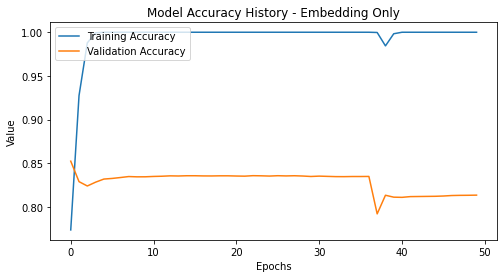

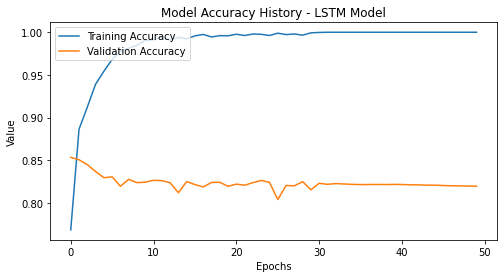

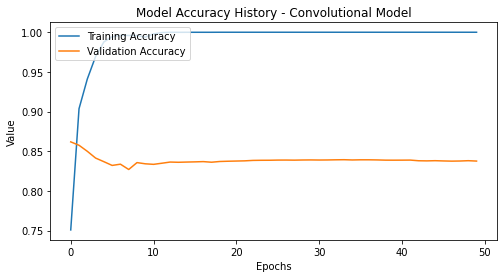

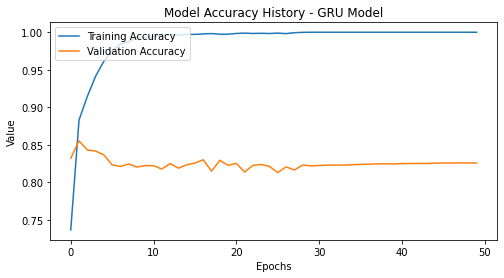

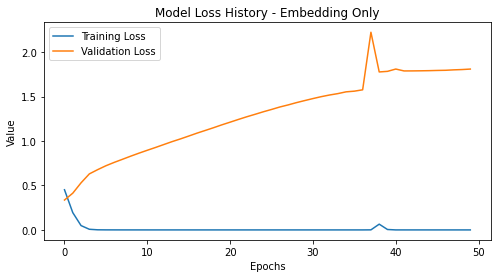

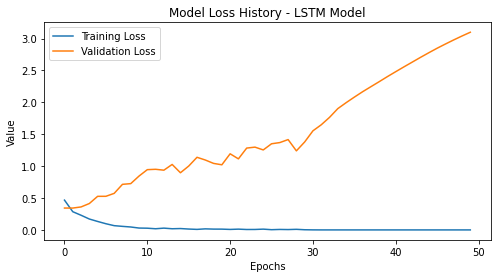

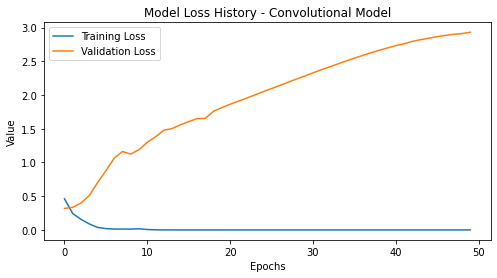

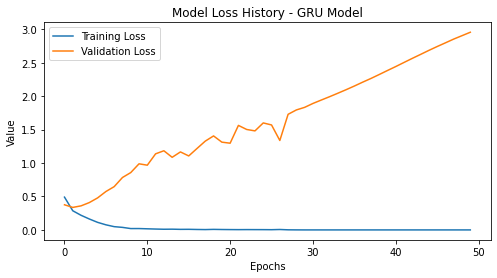

In [26]:
list_accuracy = ['accuracy', 'val_accuracy']
list_labels_accuracy = ['Training Accuracy', 'Validation Accuracy']

list_loss = ['loss', 'val_loss']
list_labels_loss = ['Training Loss', 'Validation Loss']

for key, value in model_dict.items():
  plot_model_graph(model_dict[key]['model'], 
                   list_accuracy, 
                   list_labels_accuracy, 
                   'Model Accuracy History - %s' %model_dict[key]['title'])

for key, value in model_dict.items():
  plot_model_graph(model_dict[key]['model'], 
                   list_loss, 
                   list_labels_loss, 
                   'Model Loss History - %s' %model_dict[key]['title'])